In [82]:
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization





In [83]:
beers_df = pd.read_csv('beers.csv')
breweries_df = pd.read_csv('breweries.csv')
reviews_df = pd.read_csv('reviews.csv')

In [53]:
print(beers_df.head())
print(breweries_df.head())
print(reviews_df.head())

       id                                  name  brewery_id state country  \
0  202522                        Olde Cogitator        2199    CA      US   
1   82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
2  214879                        Scottish Right       44306    IN      US   
3  320009               MegaMeow Imperial Stout        4378    WA      US   
4  246438                       Peaches-N-Cream       44617    PA      US   

                     style availability   abv                   notes retired  
0    English Oatmeal Stout     Rotating   7.3  No notes at this time.       f  
1   Russian Imperial Stout     Rotating  10.4  No notes at this time.       f  
2             Scottish Ale   Year-round   4.0  No notes at this time.       t  
3  American Imperial Stout       Winter   8.7    Every time this year       f  
4       American Cream Ale     Rotating   5.1  No notes at this time.       f  
      id                                  name           

In [54]:
print(beers_df.abv.value_counts())
print(beers_df.abv.mean())
print(beers_df['style'].value_counts(normalize=True))

5.00     23143
6.00     18073
5.50     15877
7.00     13401
6.50     13191
         ...  
8.44         1
13.43        1
12.32        1
8.29         1
1.60         1
Name: abv, Length: 939, dtype: int64
6.528504199002735
American IPA                       0.124610
American Pale Ale (APA)            0.061746
American Imperial IPA              0.051099
Belgian Saison                     0.050623
American Wild Ale                  0.036147
                                     ...   
Japanese Happoshu                  0.000343
Finnish Sahti                      0.000343
Bière de Champagne / Bière Brut    0.000323
Belgian Faro                       0.000089
Wild/Sour Beers                    0.000011
Name: style, Length: 112, dtype: float64


In [55]:
print(reviews_df.score.mean())
print(reviews_df.overall.mean())
print(reviews_df.taste.mean())
print(reviews_df.feel.mean())
print(reviews_df.smell.mean())

3.8898151232959632
3.916280372734999
3.920704092854398
3.884350221744389
3.8878625468710664


In [56]:
print(reviews_df.date.head(10))

0    2017-03-17
1    2017-12-21
2    2017-12-21
3    2017-12-20
4    2017-12-20
5    2017-12-20
6    2017-12-19
7    2017-12-16
8    2017-12-16
9    2017-12-14
Name: date, dtype: object


In [57]:
type(reviews_df.date.iloc[0])

str

In [58]:
import datetime

def date_function(datestring):
    dt = datetime.datetime.strptime(datestring, '%Y-%m-%d')
    return datetime.date(year=dt.year,month=dt.month,day=1)

reviews_df['date'] = reviews_df.date.apply(date_function)


In [59]:
type(reviews_df.date.iloc[0])

datetime.date

Let's get a few really basic statistical breakdowns.


In [60]:
print(beers_df.head(10))

       id                                  name  brewery_id state country  \
0  202522                        Olde Cogitator        2199    CA      US   
1   82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
2  214879                        Scottish Right       44306    IN      US   
3  320009               MegaMeow Imperial Stout        4378    WA      US   
4  246438                       Peaches-N-Cream       44617    PA      US   
5    8036                  World Burp Beer 2002        3469   NaN      JP   
6  108605                           Icon Sender       22598    CA      US   
7  345382                            Divina IPA       45567   NaN      IT   
8  255286                   Light Of The Ozarks       11203    AR      US   
9   29556                        Warrior's Bock        8203    SK      CA   

                     style            availability   abv  \
0    English Oatmeal Stout                Rotating   7.3   
1   Russian Imperial Stout      

In [61]:
beers_style_grouped = beers_df.groupby('style')
style_counts = beers_style_grouped.size().reset_index().rename(columns={0:'no_beers'}).sort_values(by='no_beers',ascending=False).reset_index(drop=True)
print(style_counts.head(20))
print(len(style_counts))
top_styles = style_counts.iloc[:20]

                         style  no_beers
0                 American IPA     44719
1      American Pale Ale (APA)     22159
2        American Imperial IPA     18338
3               Belgian Saison     18167
4            American Wild Ale     12972
5      American Imperial Stout     11180
6              American Porter     10168
7     American Amber / Red Ale      9748
8               American Stout      9103
9         Fruit and Field Beer      7729
10         American Blonde Ale      7089
11          American Brown Ale      7008
12           German Hefeweizen      6020
13             Belgian Witbier      5613
14     American Pale Wheat Ale      5266
15             Berliner Weisse      5036
16              German Pilsner      4748
17            Belgian Pale Ale      4523
18      Russian Imperial Stout      4426
19  English Sweet / Milk Stout      4192
112


American IPA is the standard craft beer, so it's unsurprising that it has the largest individual share of any beer style. In second and third are two other pale ales Note that there are a handful of stouts/pilsners as well among the top 20 styles. 

This displays the 20 most common beer styles as appearing in the table . 

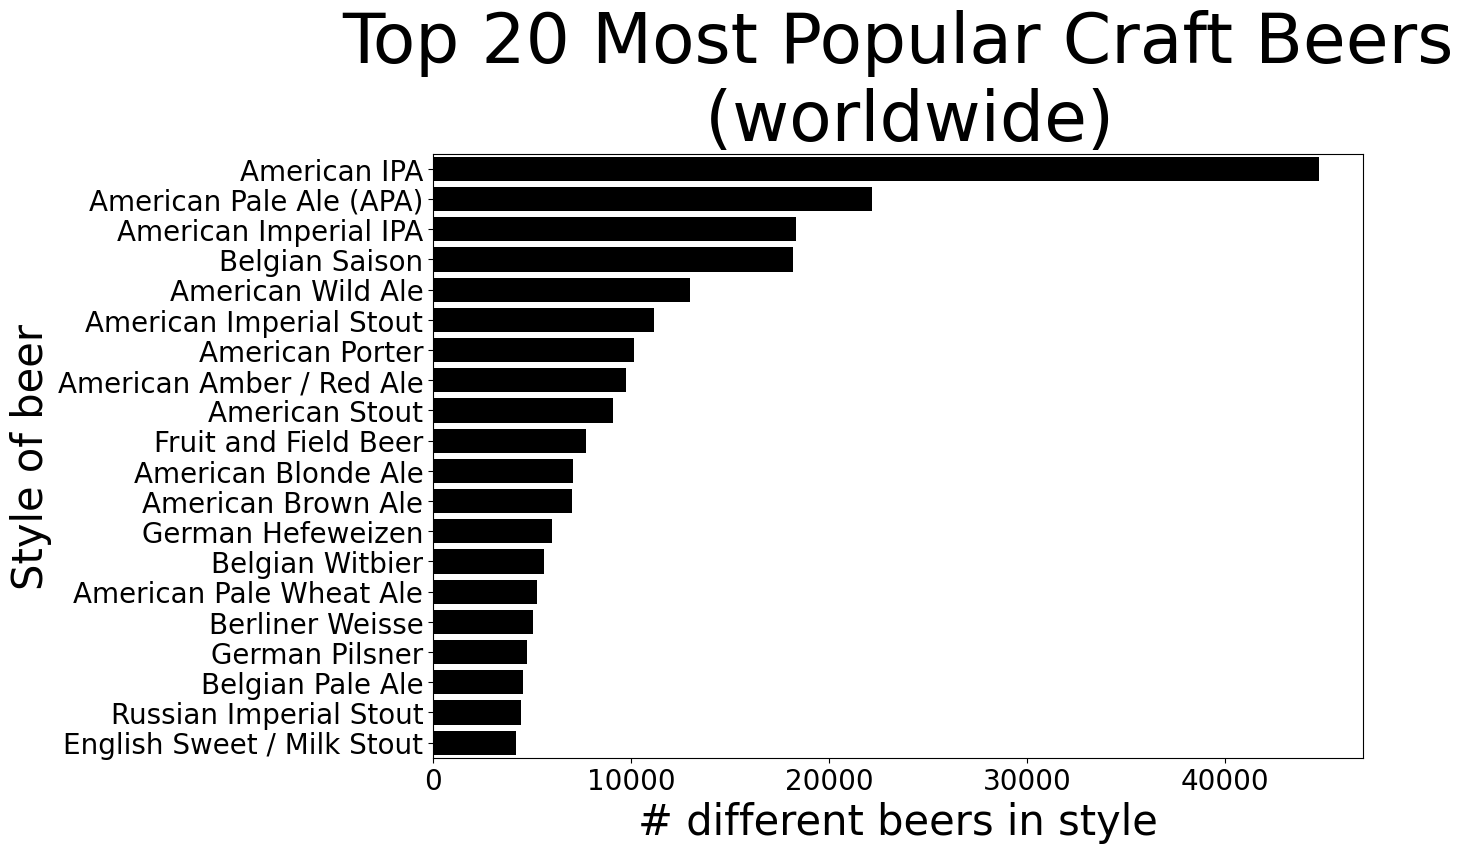

In [85]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

ax = sns.barplot(x="no_beers",y="style",color='black',data=top_styles)
ax.set()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.axes.set_title("Title",fontsize=50)
ax.set_xlabel('# different beers in style',fontsize=30)
h = ax.set_ylabel('Style of beer',fontsize=30)
plt.title('Top 20 Most Popular Craft Beers\n (worldwide)',fontsize=50)
plt.savefig('most_popular_beers_worldwide.jpeg',bbox_inches='tight')
plt.show()


American beers account for 73.971 percent of all beers in the table
                         style  no_beers
0                 American IPA     37240
1      American Pale Ale (APA)     17017
2        American Imperial IPA     15965
3               Belgian Saison     14653
4            American Wild Ale     11140
5      American Imperial Stout      9344
6              American Porter      8870
7               American Stout      7975
8     American Amber / Red Ale      7656
9           American Brown Ale      6130
10         American Blonde Ale      5525
11        Fruit and Field Beer      5174
12     American Pale Wheat Ale      4459
13             Berliner Weisse      4140
14             Belgian Witbier      3747
15           German Hefeweizen      3712
16  English Sweet / Milk Stout      3502
17      Russian Imperial Stout      3137
18          American Black Ale      3008
19            Belgian Pale Ale      2950
112


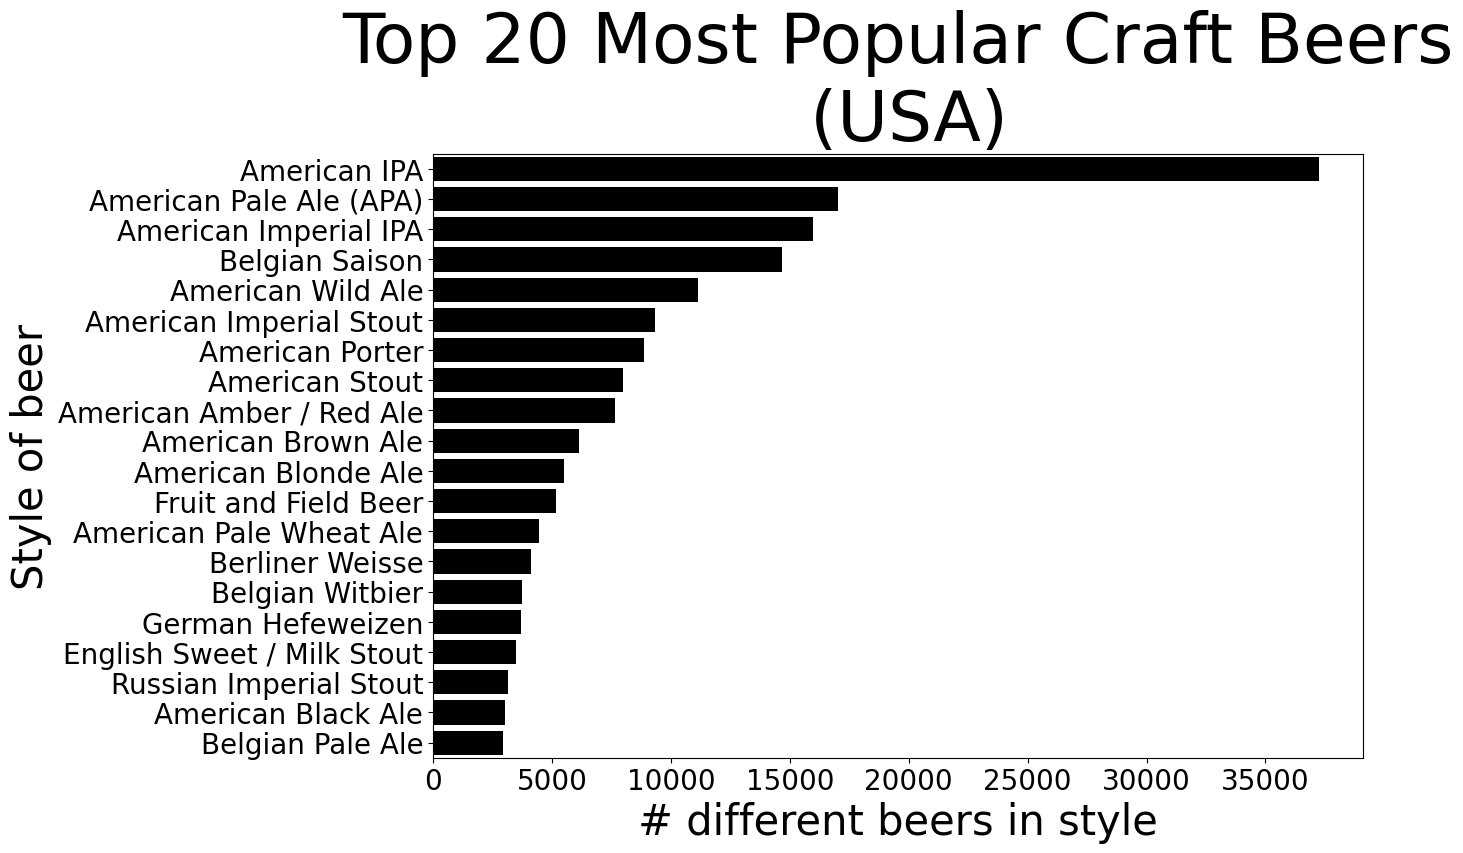

In [87]:
us_beers_df = beers_df[beers_df['country']=='US']
print("American beers account for " + str(round(100*len(us_beers_df)/len(beers_df),3)) + " percent of all beers in the table")
us_beers_style_grouped = us_beers_df.groupby('style')
us_style_counts = us_beers_style_grouped.size().reset_index().rename(columns={0:'no_beers'}).sort_values(by='no_beers',ascending=False).reset_index(drop=True)
print(us_style_counts.head(20))
print(len(us_style_counts))
us_top_styles = us_style_counts.iloc[:20]

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

ax = sns.barplot(x="no_beers",y="style",color='black',data=us_top_styles)
ax.set()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.axes.set_title("Title",fontsize=50)
ax.set_xlabel('# different beers in style',fontsize=30)
h = ax.set_ylabel('Style of beer',fontsize=30)
plt.title('Top 20 Most Popular Craft Beers\n (USA)',fontsize=50)
plt.savefig('most_popular_beers_us.jpeg',bbox_inches='tight')
plt.show()


   state  no_beers
0     CA     33649
1     PA     17083
2     NY     14572
3     CO     14182
4     MI     12690
5     IL     12444
6     FL     11898
7     WA     10902
8     VA      9986
9     NC      9351
10    OR      9319
11    MA      8479
12    OH      8303
13    TX      7970
14    MN      7373
15    WI      5951
16    IN      5724
17    MO      4431
18    NJ      4376
19    MD      4190
51


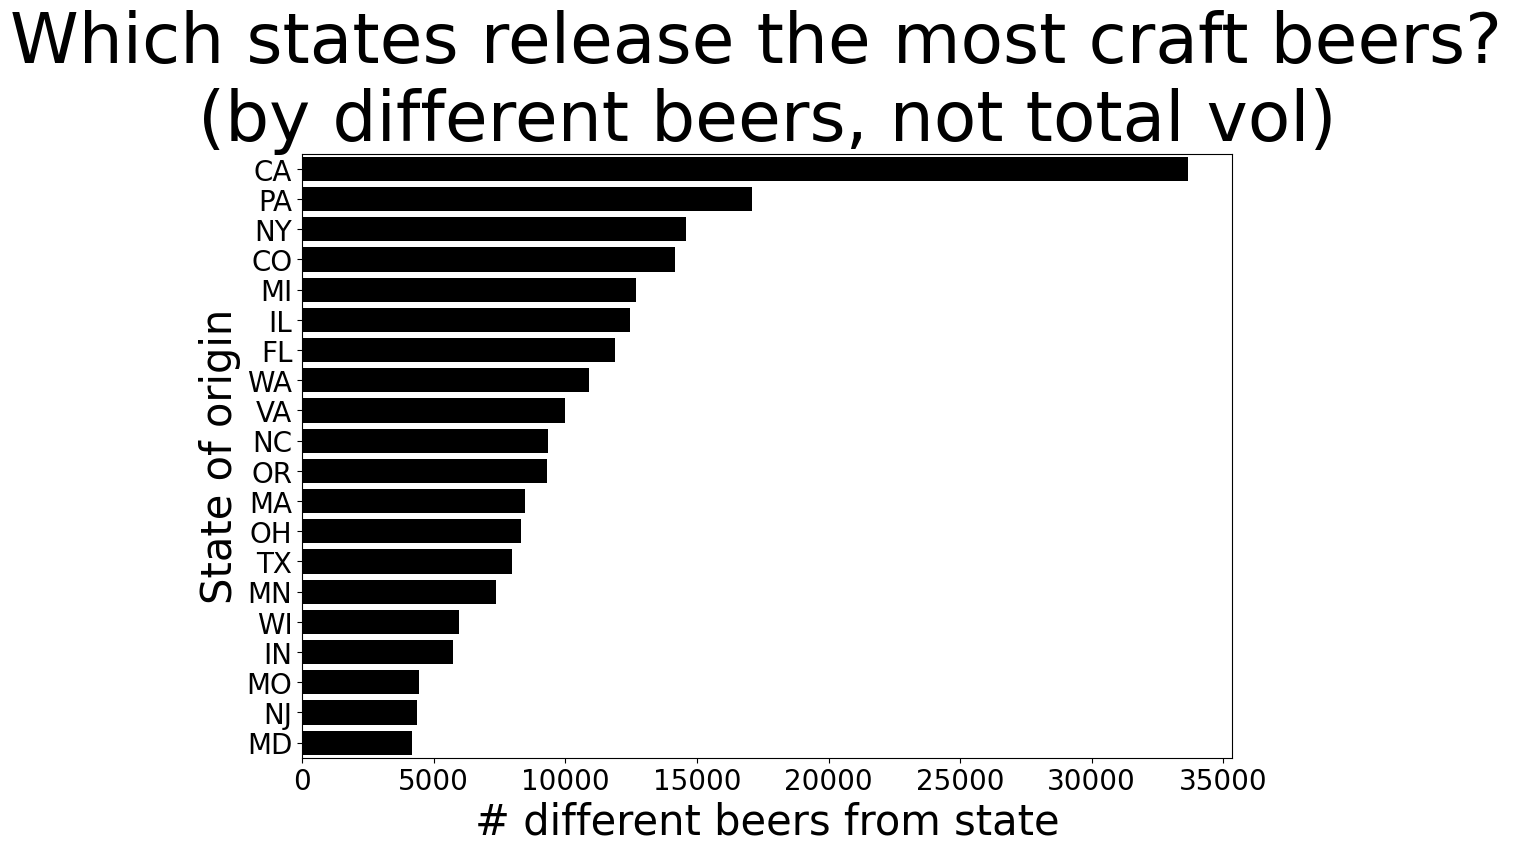

In [88]:
us_beers_state_grouped = us_beers_df.groupby('state')
us_state_counts = us_beers_state_grouped.size().reset_index().rename(columns={0:'no_beers'}).sort_values(by='no_beers',ascending=False).reset_index(drop=True)
print(us_state_counts.head(20))
print(len(us_state_counts))
us_top_state = us_state_counts.iloc[:20]

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

ax = sns.barplot(x="no_beers",y="state",color='black',data=us_top_state)
ax.set()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.axes.set_title("Title",fontsize=50)
ax.set_xlabel('# different beers from state',fontsize=30)
h = ax.set_ylabel('State of origin',fontsize=30)
plt.title('Which states release the most craft beers? \n(by different beers, not total vol)',fontsize=50)

plt.savefig('number_beers_per_state.jpeg',bbox_inches='tight')
plt.show()

What is the distribution of alcohol content?


In [65]:
import math
beers_df_abv = beers_df[['abv']].reset_index()

beers_df_abv.dropna(inplace=True)

beers_df_abv['abv'] = beers_df_abv.abv.apply(lambda x: math.ceil(x))




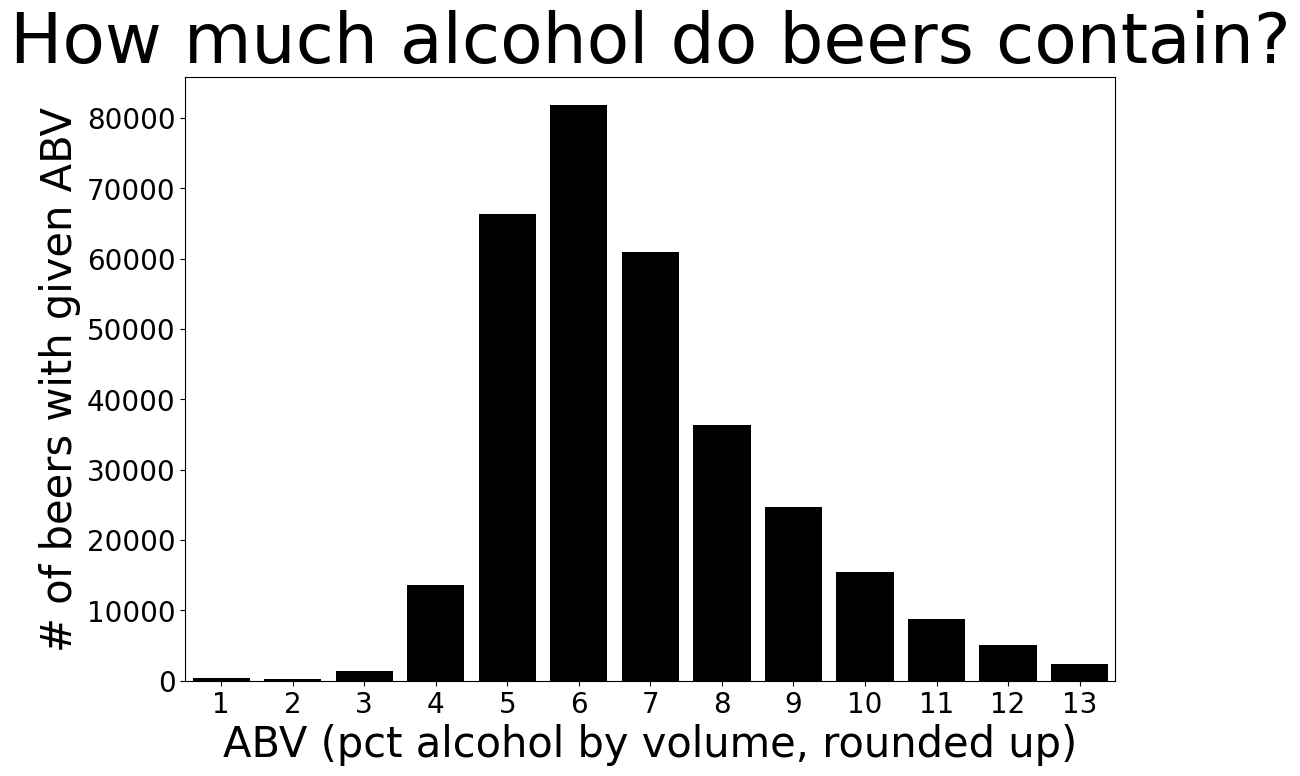

In [89]:

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

ax = sns.countplot(x="abv",color='black',data=beers_df_abv)
ax.set()
plt.xlim(-0.5,12.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.axes.set_title("Title",fontsize=50)
ax.set_xlabel('ABV (pct alcohol by volume, rounded up)',fontsize=30)
h = ax.set_ylabel('# of beers with given ABV',fontsize=30)
plt.title('How much alcohol do beers contain?',fontsize=50)

plt.savefig('beer_abv.jpeg',bbox_inches='tight')
plt.show()


The following will be classed as "Pale Ale":

'American IPA',
'American Pale Ale (APA)', 
'American Imperial IPA',
'Belgian Pale Ale', 
'English Pale Ale',
'Belgian Strong Pale Ale', 
'English Pale Mild Ale', 
'English India Pale Ale (IPA)', 
'Belgian IPA','New England IPA',
'American Brut IPA'

The following will be classed as "Lager":

'German Pilsner',
'German Märzen / Oktoberfest',
'American Lager',
'European Pale Lager',
'Bohemian Pilsener',
'German Helles',
'German Bock',
'German Maibock',
'German Schwarzbier',
'German Doppelbock',
'Vienna Lager',
'Munich Dunkel Lager',
'American Light Lager',
'American Amber / Red Lager',
'German Kellerbier / Zwickelbier',
'German Weizenbock',
'European Dark Lager',
'European Export / Dortmunder',
'German Rauchbier',
'American Imperial Pilsner',
'European Strong Lager',
'Japanese Rice Lager'

The following will be classed as "Stout/Porter" (realize that Stout uses unmalted barley and Porter uses malted barley, but the varieties are too similar to distinguish at this level). 

'American Imperial Stout',
'American Porter',
'American Stout',
'Russian Imperial Stout',
'English Sweet / Milk Stout',
'English Oatmeal Stout',
'English Porter',
'Irish Dry Stout',
'Baltic Porter',
'English Stout',
'Foreign / Export Stout',
'American Imperial Porter',
'Smoke Porter',
'Robust Porter'



In [67]:
def crude_sort(beer):
    if beer in ['Pale Ale', 
                'American IPA',
                'American Pale Ale (APA)', 
                'American Imperial IPA',
                'Belgian Pale Ale', 
                'English Pale Ale',
                'Belgian Strong Pale Ale', 
                'English Pale Mild Ale', 
                'English India Pale Ale (IPA)', 
                'Belgian IPA','New England IPA',
                'American Brut IPA']:
        return 'Pale Ale'
    elif beer in ['German Pilsner',
                'German Märzen / Oktoberfest',
                'American Lager',
                'European Pale Lager',
                'Bohemian Pilsener',
                'German Helles',
                'German Bock',
                'German Maibock',
                'German Schwarzbier',
                'German Doppelbock',
                'Vienna Lager',
                'Munich Dunkel Lager',
                'American Light Lager',
                'American Amber / Red Lager',
                'German Kellerbier / Zwickelbier',
                'German Weizenbock',
                'European Dark Lager',
                'European Export / Dortmunder',
                'German Rauchbier',
                'American Imperial Pilsner',
                'European Strong Lager',
                'Japanese Rice Lager',
                'Lager']:
        return 'Lager'
    elif beer in ['American Imperial Stout',
                'American Porter',
                'American Stout',
                'Russian Imperial Stout',
                'English Sweet / Milk Stout',
                'English Oatmeal Stout',
                'English Porter',
                'Irish Dry Stout',
                'Baltic Porter',
                'English Stout',
                'Foreign / Export Stout',
                'American Imperial Porter',
                'Smoke Porter',
                'Robust Porter',
                'Porter/Stout']:
        return 'Porter/Stout'
    else:
        return 'Other'

beers_df['style'] = beers_df['style'].apply(crude_sort)

beers = beers_df[beers_df['style'] != 'Other']
print(beers.head(5))


       id                                  name  brewery_id state country  \
0  202522                        Olde Cogitator        2199    CA      US   
1   82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
3  320009               MegaMeow Imperial Stout        4378    WA      US   
5    8036                  World Burp Beer 2002        3469   NaN      JP   
6  108605                           Icon Sender       22598    CA      US   

          style            availability   abv                   notes retired  
0  Porter/Stout                Rotating   7.3  No notes at this time.       f  
1  Porter/Stout                Rotating  10.4  No notes at this time.       f  
3  Porter/Stout                  Winter   8.7    Every time this year       f  
5         Lager   Limited (brewed once)   5.5  No notes at this time.       t  
6         Lager              Year-round   5.6  No notes at this time.       f  


In [68]:
print(beers['style'].value_counts())
# We can see that Pale ale is winning by a factor of 2 to 3. 
# Not a huge surprise as it is perhaps the stereotype of a craft beer 

Pale Ale        104026
Porter/Stout     51246
Lager            39230
Name: style, dtype: int64


In [69]:
review_beers = beers.merge(reviews_df, left_on = 'id',right_on = 'beer_id')
print(review_beers.head(10))

      id                                  name  brewery_id state country  \
0  82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
1  82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
2  82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
3  82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
4  82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
5  82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
6  82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
7  82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
8  82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
9  82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   

          style availability   abv                   notes retired  beer_id  \
0  Porter/Stout     Rotating  10.4  No notes at this time.       f    82352   
1  Po

In [70]:
review_dates = review_beers[['beer_id','date']]

review_dates = review_dates.groupby(by='beer_id').agg(np.min)
review_dates.reset_index(inplace=True)
print(review_dates)


        beer_id        date
0             3  2002-04-01
1             4  2002-04-01
2             5  2001-07-01
3             9  2002-03-01
4            12  1998-10-01
...         ...         ...
169326   373114  2018-09-01
169327   373115  2018-09-01
169328   373116  2018-09-01
169329   373121  2018-09-01
169330   373122  2018-09-01

[169331 rows x 2 columns]


In [71]:
review_dates.rename(columns={'id':'beer_id','date':'first_review'},inplace=True)
print(review_dates.head(5))


   beer_id first_review
0        3   2002-04-01
1        4   2002-04-01
2        5   2001-07-01
3        9   2002-03-01
4       12   1998-10-01


In [72]:
review_beers = review_beers.merge(review_dates, left_on = 'beer_id',right_on = 'beer_id')
print(review_beers.head())

      id                                  name  brewery_id state country  \
0  82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
1  82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
2  82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
3  82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
4  82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   

          style availability   abv                   notes retired  ...  \
0  Porter/Stout     Rotating  10.4  No notes at this time.       f  ...   
1  Porter/Stout     Rotating  10.4  No notes at this time.       f  ...   
2  Porter/Stout     Rotating  10.4  No notes at this time.       f  ...   
3  Porter/Stout     Rotating  10.4  No notes at this time.       f  ...   
4  Porter/Stout     Rotating  10.4  No notes at this time.       f  ...   

   username        date text  look  smell  taste  feel  overall  score  \
0     FZR23  2018-

Now we want to look at the review data and see how ratings for each of the big three beer families have changed over time. We'll need to join the data in the beers data frame to the data in the reviews data frame. 

In [73]:
review_beers = review_beers[['id','style','abv','date','look','smell','taste','feel','overall','score','first_review']]

In [74]:
import numpy as np

reviews_grouped = review_beers.groupby(['style','first_review']).agg(np.mean).reset_index()

In [75]:
print(reviews_grouped.head(6))
print(len(reviews_grouped))
print(type(reviews_grouped))


   style first_review          id       abv      look     smell     taste  \
0  Lager   1998-01-01   97.000000  5.000000  3.698157  3.474654  3.599078   
1  Lager   1998-02-01  145.180763  5.197937  3.814060  3.655502  3.780948   
2  Lager   1998-03-01  319.590825  4.965399  3.404549  3.228001  3.384787   
3  Lager   1998-04-01  121.824561  6.657193  4.062431  3.907603  4.087958   
4  Lager   1998-05-01  285.647059       NaN  3.365385  3.500000  3.538462   
5  Lager   1998-06-01  428.000000       NaN       NaN       NaN       NaN   

       feel   overall     score  
0  3.627880  3.678571  3.615813  
1  3.711921  3.864748  3.711800  
2  3.390007  3.495899  3.347507  
3  4.011654  4.063818  4.028032  
4  3.500000  3.500000  3.505882  
5       NaN       NaN  3.820000  
705
<class 'pandas.core.frame.DataFrame'>


Cool, this table basically contains all the data we want: the ratings for each type of beer as a function of time. Let's visualize. 

In [76]:
lager_df = reviews_grouped[reviews_grouped['style']=='Lager']
pale_df = reviews_grouped[reviews_grouped['style']=='Pale Ale']
porter_df = reviews_grouped[reviews_grouped['style']=='Porter/Stout']

# smell_df = review_beers['style','date','smell']
# taste_df = review_beers['style','date','taste']
# feel_df = review_beers['style','date','feel']
# look_df = review_beers['style','date','look']
# overall_df = review_beers['style','date','overall']
# score_df = review_beers['style','date','score']

In [77]:
print(len(lager_df))
print(len(pale_df))
print(len(porter_df))

234
237
234


In [78]:
def crude_date_year(input):
    return datetime.date(input.year,1,1)

# for num in range(50,60):
#     print(crude_date_year(reviews_grouped['first_review'].iloc[num]))

reviews_grouped['crude_date'] = reviews_grouped.first_review.apply(crude_date_year)
year_ticks = sorted(reviews_grouped.crude_date.unique())
print(year_ticks)
print(reviews_grouped['crude_date'].value_counts())

[datetime.date(1996, 1, 1), datetime.date(1998, 1, 1), datetime.date(1999, 1, 1), datetime.date(2000, 1, 1), datetime.date(2001, 1, 1), datetime.date(2002, 1, 1), datetime.date(2003, 1, 1), datetime.date(2004, 1, 1), datetime.date(2005, 1, 1), datetime.date(2006, 1, 1), datetime.date(2007, 1, 1), datetime.date(2008, 1, 1), datetime.date(2009, 1, 1), datetime.date(2010, 1, 1), datetime.date(2011, 1, 1), datetime.date(2012, 1, 1), datetime.date(2013, 1, 1), datetime.date(2014, 1, 1), datetime.date(2015, 1, 1), datetime.date(2016, 1, 1), datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)]
2012-01-01    36
2001-01-01    36
2016-01-01    36
2009-01-01    36
2015-01-01    36
2005-01-01    36
2011-01-01    36
2002-01-01    36
2008-01-01    36
2003-01-01    36
2006-01-01    36
2017-01-01    36
2013-01-01    36
2014-01-01    36
2007-01-01    36
2010-01-01    36
2004-01-01    36
1998-01-01    31
2018-01-01    27
2000-01-01    18
1999-01-01    16
1996-01-01     1
Name: crude_date, dtype: int64


In [79]:
print(type(reviews_grouped.crude_date[0]))
print(type(reviews_grouped.first_review[0]))

<class 'datetime.date'>
<class 'datetime.date'>


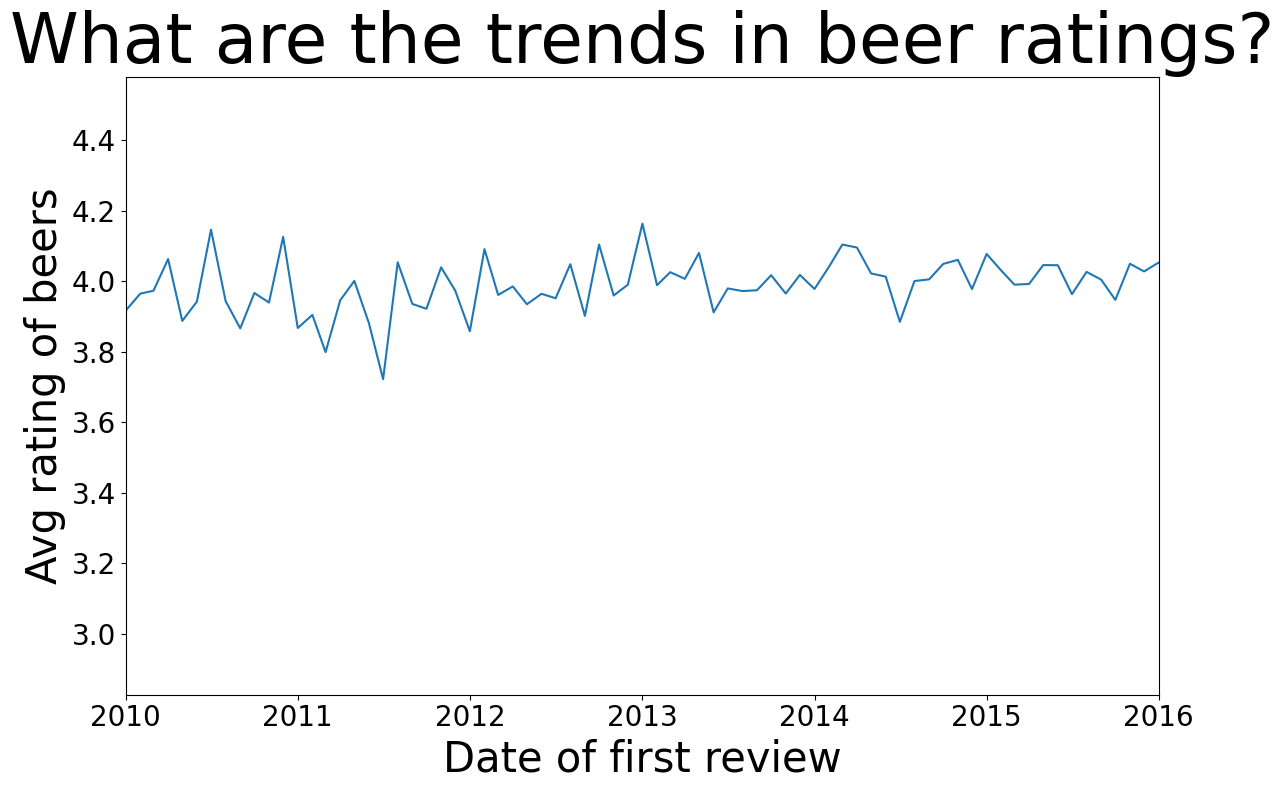

In [94]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.lineplot(x="first_review",y='overall',data=review_beers)
ax.set()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(datetime.date(2010,1,1),datetime.date(2016,1,1))
ax.axes.set_title("Title",fontsize=30)
ax.set_xlabel('Date of first review',fontsize=30)
h = ax.set_ylabel('Avg rating of beers',fontsize=30)
plt.title('What are the trends in beer ratings?',fontsize=50)
plt.tight_layout()
plt.savefig('all_popularity_time.jpeg',bbox_inches='tight')
plt.show()

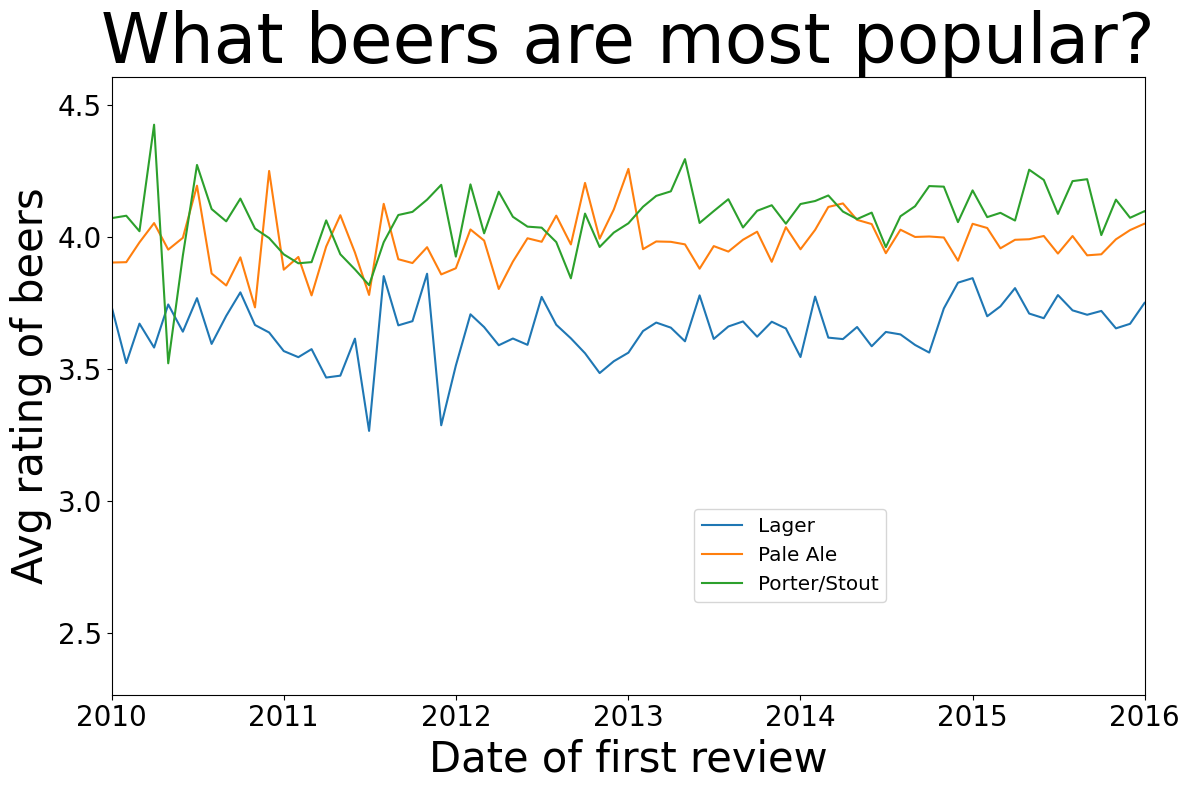

In [101]:

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

ax = sns.lineplot(x="first_review",y='overall',hue='style',data=reviews_grouped)
ax.set()

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(datetime.date(2010,1,1),datetime.date(2016,1,1))
plt.legend(bbox_to_anchor=(0.75, 0.3),borderaxespad=0,fontsize = 'x-large')

ax.axes.set_title("Title",fontsize=30)
ax.set_xlabel('Date of first review',fontsize=30)
h = ax.set_ylabel('Avg rating of beers',fontsize=30)
plt.title('What beers are most popular?',fontsize=50)
plt.savefig('beer_ratings.jpeg',bbox_inches='tight')
plt.tight_layout()
plt.savefig('style_popularity_time.jpeg',bbox_inches='tight')

plt.show()


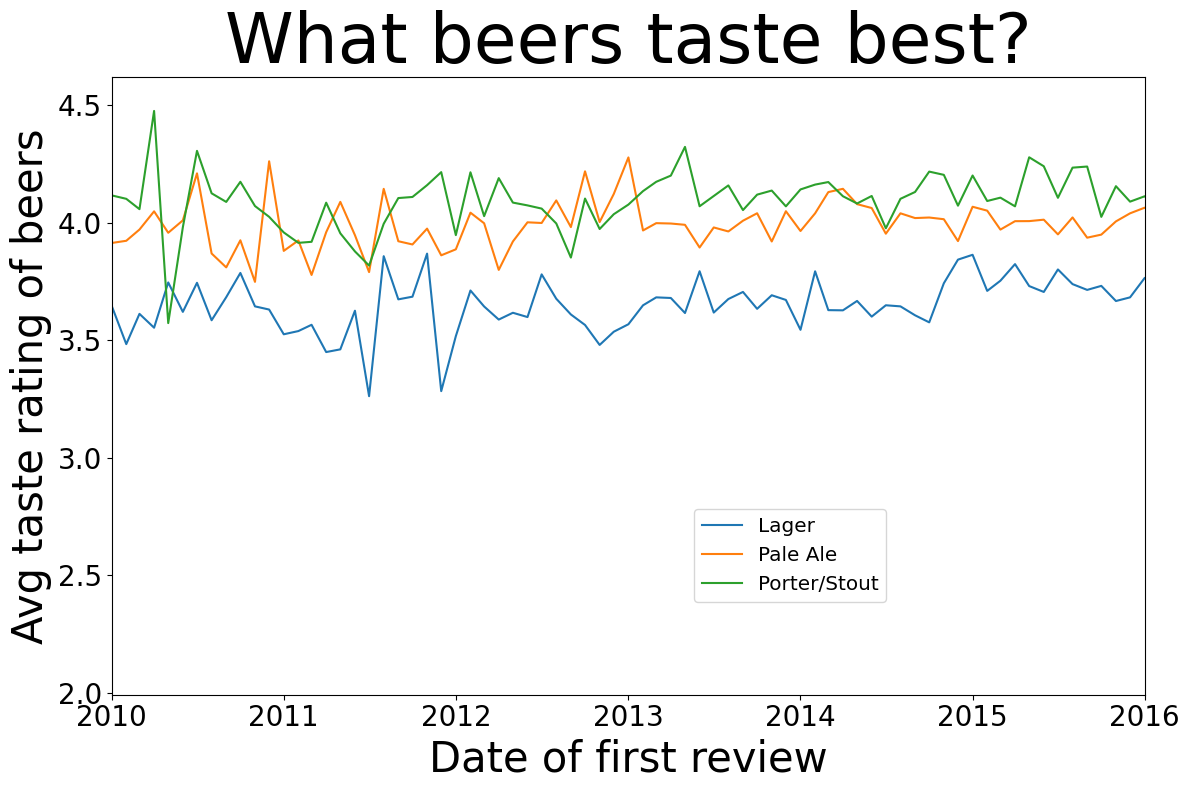

In [100]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

ax = sns.lineplot(x="first_review",y='taste',hue='style',data=reviews_grouped)
ax.set()

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(datetime.date(2010,1,1),datetime.date(2016,1,1))

plt.legend(bbox_to_anchor=(0.75, 0.3),borderaxespad=0,fontsize = 'x-large')
# plt.setp(legend.get_title(),fontsize='xx-large')
ax.axes.set_title("Title",fontsize=30)
ax.set_xlabel('Date of first review',fontsize=30)
h = ax.set_ylabel('Avg taste rating of beers',fontsize=30)
plt.title('What beers taste best?',fontsize=50)
plt.tight_layout()
plt.savefig('style_taste_time.jpeg',bbox_inches='tight')

plt.show()


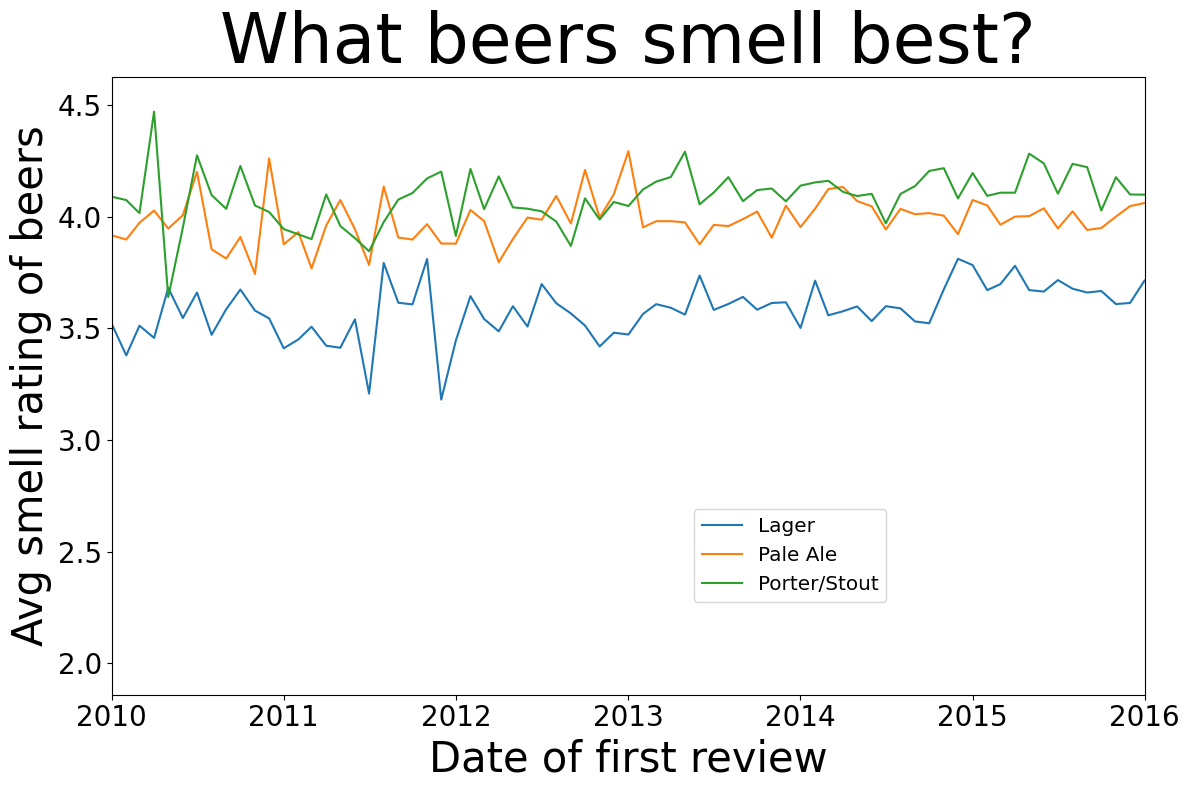

In [102]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

ax = sns.lineplot(x="first_review",y='smell',hue='style',data=reviews_grouped)
ax.set()

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(datetime.date(2010,1,1),datetime.date(2016,1,1))
plt.legend(bbox_to_anchor=(0.75, 0.3),borderaxespad=0,fontsize = 'x-large')
# plt.setp(legend.get_title(),fontsize='xx-large')
ax.axes.set_title("Title",fontsize=30)
ax.set_xlabel('Date of first review',fontsize=30)
h = ax.set_ylabel('Avg smell rating of beers',fontsize=30)
plt.title('What beers smell best?',fontsize=50)
plt.tight_layout()
plt.savefig('style_smell_time.jpeg',bbox_inches='tight')

plt.show()


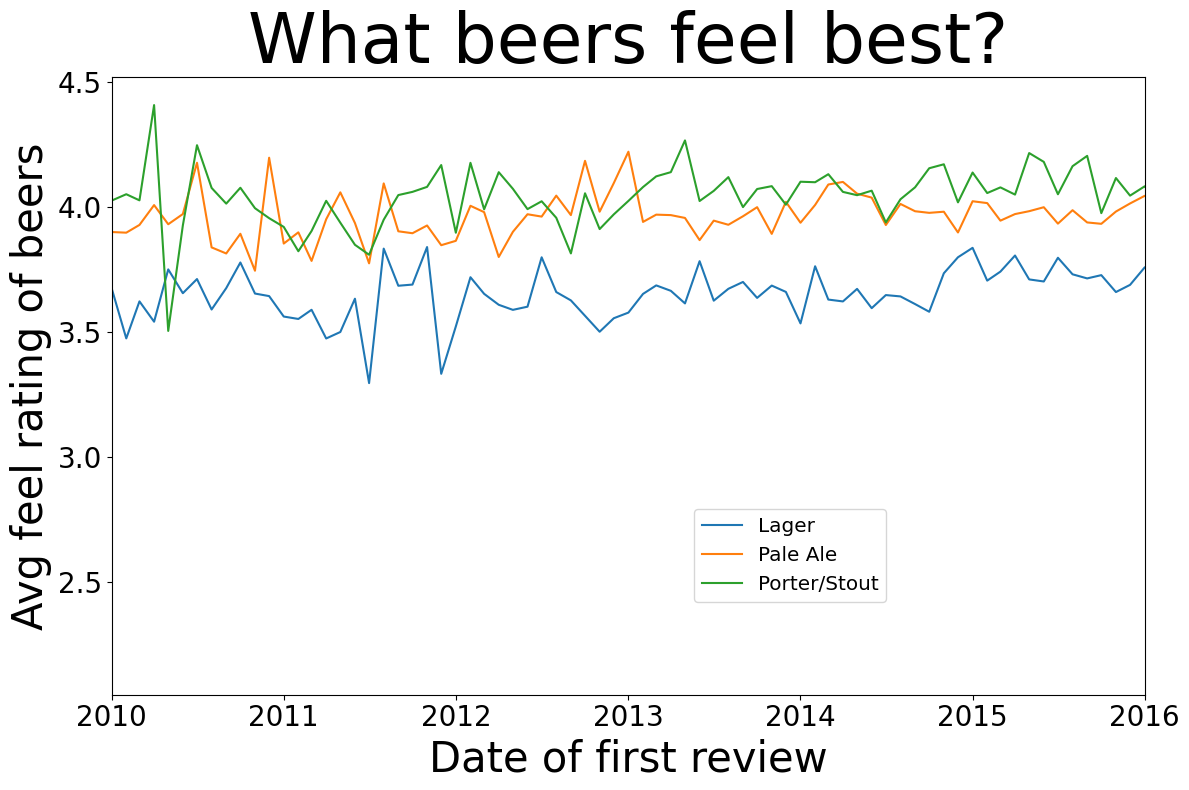

In [119]:

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

ax = sns.lineplot(x="first_review",y='feel',hue='style',data=reviews_grouped)
ax.set()

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(datetime.date(2010,1,1),datetime.date(2016,1,1))
plt.legend(bbox_to_anchor=(0.75, 0.3),borderaxespad=0,fontsize = 'x-large')
# plt.setp(legend.get_title(),fontsize='xx-large')
ax.axes.set_title("Title",fontsize=30)
ax.set_xlabel('Date of first review',fontsize=30)
h = ax.set_ylabel('Avg feel rating of beers',fontsize=30)
plt.title('What beers feel best?',fontsize=50)
plt.tight_layout()
plt.savefig('style_feel_time.jpeg',bbox_inches='tight')

plt.show()

In [104]:
cut_alc_review_beers = review_beers[review_beers['abv'] < 20]
print(cut_alc_review_beers.head(10))

cut_alc_review_beers_grouped = cut_alc_review_beers.groupby(['first_review']).agg(np.mean).reset_index()

# ax = sns.lineplot(x="first_review",y='abv',data=cut_alc_review_beers_grouped.query('abv < 15'))
# ax.set()
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.xlim(datetime.date(2010,1,1),datetime.date(2016,1,1))
# plt.legend(bbox_to_anchor=(0.75, 0.3),borderaxespad=0,fontsize = 'x-large')
# plt.setp(legend.get_title(),fontsize='xx-large')
# ax.axes.set_title("Title",fontsize=30)
# ax.set_xlabel('Date of first review',fontsize=30)
# h = ax.set_ylabel('Avg feel rating of beers',fontsize=30)
# plt.title('What is the average alcohol content?',fontsize=50)
# plt.tight_layout()
# plt.savefig('style_feel_time.jpeg',bbox_inches='tight')

# plt.show()

      id         style   abv        date  look  smell  taste  feel  overall  \
0  82352  Porter/Stout  10.4  2018-05-01  4.50   4.50   4.50  4.50     4.50   
1  82352  Porter/Stout  10.4  2018-02-01  4.25   4.00   4.00  4.25     4.25   
2  82352  Porter/Stout  10.4  2017-10-01  4.00   4.00   4.00  4.00     4.00   
3  82352  Porter/Stout  10.4  2017-09-01  4.00   4.00   3.50  3.50     3.75   
4  82352  Porter/Stout  10.4  2017-09-01  4.50   4.00   4.25  4.25     4.00   
5  82352  Porter/Stout  10.4  2017-09-01  4.25   4.25   4.00  4.25     4.25   
6  82352  Porter/Stout  10.4  2017-06-01  3.75   3.75   4.00  4.00     4.00   
7  82352  Porter/Stout  10.4  2017-06-01  4.00   4.25   4.00  3.75     3.75   
8  82352  Porter/Stout  10.4  2017-05-01  4.00   4.00   4.00  4.00     4.00   
9  82352  Porter/Stout  10.4  2017-02-01  3.00   3.00   3.50  3.50     3.50   

   score first_review  
0   4.50   2012-06-01  
1   4.09   2012-06-01  
2   4.00   2012-06-01  
3   3.70   2012-06-01  
4   4.16  

In [113]:
print(cut_alc_review_beers.head())
cut_alc_review_grouped_style_date = cut_alc_review_beers.groupby(by=['style','first_review']).agg(np.mean).reset_index()
print(cut_alc_review_grouped_style_date.head(10))

      id         style   abv        date  look  smell  taste  feel  overall  \
0  82352  Porter/Stout  10.4  2018-05-01  4.50    4.5   4.50  4.50     4.50   
1  82352  Porter/Stout  10.4  2018-02-01  4.25    4.0   4.00  4.25     4.25   
2  82352  Porter/Stout  10.4  2017-10-01  4.00    4.0   4.00  4.00     4.00   
3  82352  Porter/Stout  10.4  2017-09-01  4.00    4.0   3.50  3.50     3.75   
4  82352  Porter/Stout  10.4  2017-09-01  4.50    4.0   4.25  4.25     4.00   

   score first_review  
0   4.50   2012-06-01  
1   4.09   2012-06-01  
2   4.00   2012-06-01  
3   3.70   2012-06-01  
4   4.16   2012-06-01  
   style first_review          id       abv      look     smell     taste  \
0  Lager   1998-01-01   97.000000  5.000000  3.698157  3.474654  3.599078   
1  Lager   1998-02-01  145.180763  5.197937  3.814060  3.655502  3.780948   
2  Lager   1998-03-01  319.534787  4.965399  3.404549  3.228001  3.384787   
3  Lager   1998-04-01  121.824561  6.657193  4.062431  3.907603  4.087958

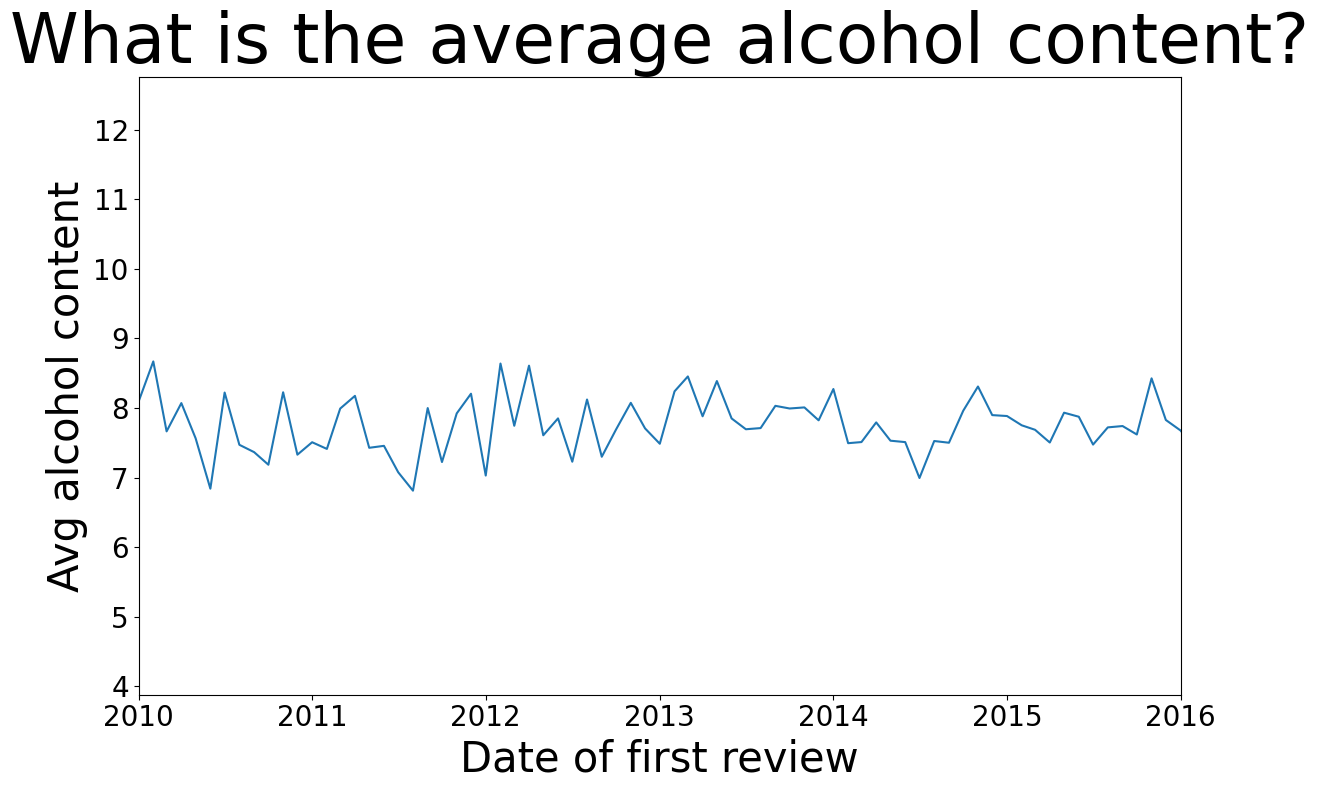

In [118]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')


ax = sns.lineplot(x="first_review",y='abv',data=cut_alc_review_beers_grouped)
ax.set()

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(datetime.date(2010,1,1),datetime.date(2016,1,1))
# plt.legend(bbox_to_anchor=(0.75, 0.3),borderaxespad=0,fontsize = 'x-large')
# plt.setp(legend.get_title(),fontsize='xx-large')
ax.set_xlabel('Date of first review',fontsize=30)
h = ax.set_ylabel('Avg alcohol content',fontsize=30)
plt.title('What is the average alcohol content?',fontsize=50)
plt.tight_layout()
plt.savefig('alcohol_time.jpeg',bbox_inches='tight')

plt.show()

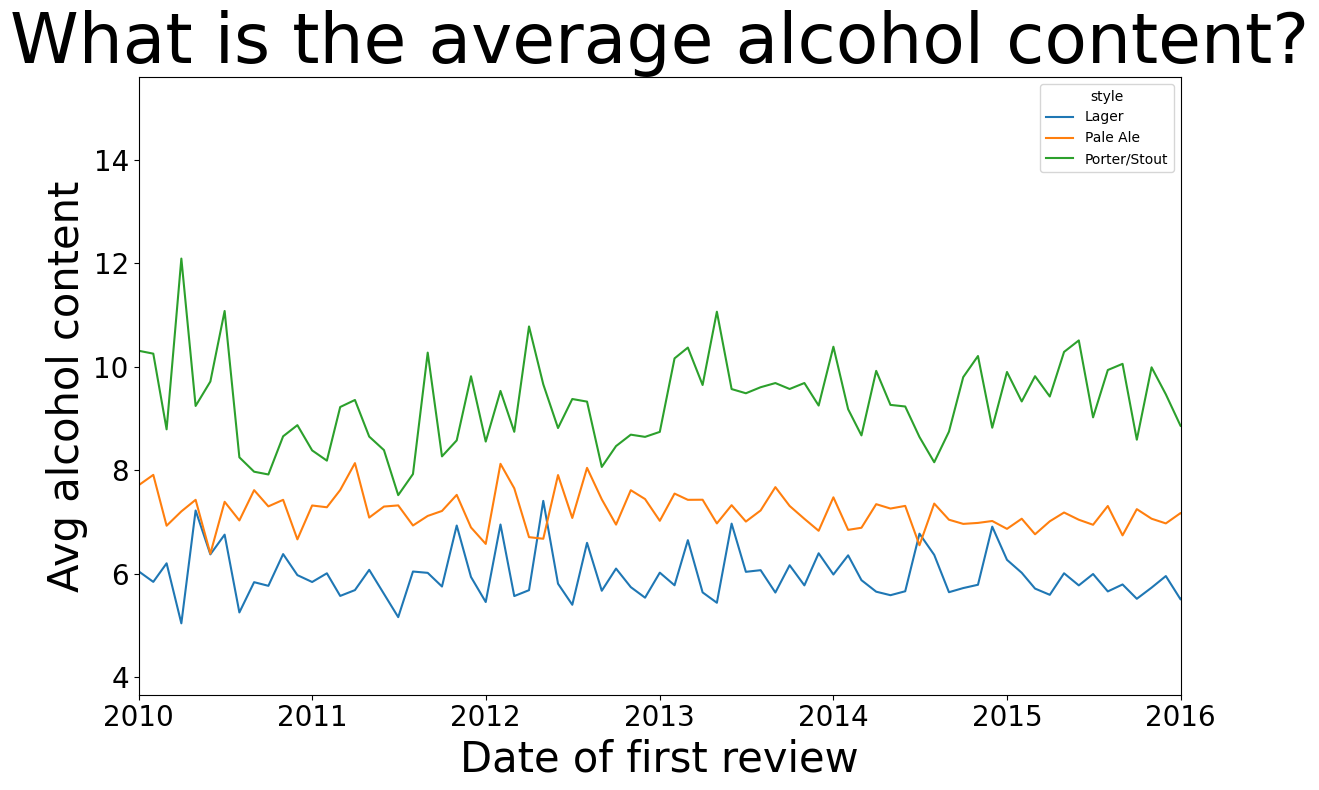

In [117]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')


ax = sns.lineplot(x="first_review",y='abv',hue="style",data=cut_alc_review_grouped_style_date)
ax.set()

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(datetime.date(2010,1,1),datetime.date(2016,1,1))
# plt.legend(bbox_to_anchor=(0.75, 0.3),borderaxespad=0,fontsize = 'x-large')
# plt.setp(legend.get_title(),fontsize='xx-large')
ax.set_xlabel('Date of first review',fontsize=30)
h = ax.set_ylabel('Avg alcohol content',fontsize=30)
plt.title('What is the average alcohol content?',fontsize=50)
plt.tight_layout()
plt.savefig('alochol_content_time_style.jpeg',bbox_inches='tight')

plt.show()

So we see that the average ABV is relatively stable. The average alcohol content of the porter/stout category is skewed upward a bit by the presence of very high-alcohol beers. Somewhat interesting is the fact that the ratings follow the alcohol content pretty closely: porter has the most booze and the highest ratings, then pale ale, then lager. 

So there aren't any real surprises in these graphs, although the porters established "taste dominance" first, and then smell, then feel (and overall). 

Some new questions:

- Of the 100 most reviewed beers, is there a different correlation between style and rating? 


- What are the "worst" beers? What style are they? 


- If we look at availability scores, is there any connection with various scores?
- If we restrict to the United States and look at state stuff, is there a connection with style popularity. 
- How does abv affect rating? Are weaker beers higher rated? The opposite? 
- If we restrict to beers that have not been retired, does that affect ratings? 
- What kind of beers are popular outside of the United States? 



In [ ]:
top_reviewed_beers = review_beers.merge(reviews_df, left_on = 'id',right_on = 'beer_id')

In [ ]:

# top_reviewed_beers = top_reviewed_beers[['beer_id']]
# top_reviewed_beers['extra']=1
# print(top_reviewed_beers.head(10))


In [ ]:
top = top_reviewed_beers.groupby('beer_id').sum()

In [ ]:
top.rename(columns = {'extra':'number_reviews'},inplace = True)

In [ ]:
print(top.head())

In [ ]:
top.sort_values(by='number_reviews',ascending=False,inplace=True)

In [ ]:
print(top.head())

In [ ]:
top.reset_index(inplace=True)


In [ ]:
print(top.head())

In [ ]:
top1=top.copy()
most_reviewed_beers = top1[:100]


In [ ]:
print(review_beers.columns)
print(most_reviewed_beers.columns)

In [ ]:
most_reviewed_beers_df = review_beers.merge(most_reviewed_beers, left_on = 'id',right_on = 'beer_id')

In [ ]:
print(most_reviewed_beers_df.columns)

Now we can filter the beer_review database to look at only the most-reviewed beers. 

In [ ]:
print(len(review_beers))
print(len(most_reviewed_beers_df))


You can see that the 100 most frequently reviewed beers account for a seventh of the reviews. 

In [ ]:
sns.lineplot(x="date", y="overall", data=most_reviewed_beers_df,hue="style")
plt.xticks(rotation=15)
plt.title('Overall Ratings for 100 most frequently reviewed beers')
plt.show()

There's wider confidence intervals around the averages, because a smaller data set with identical distribution --> higher variance. 



In [ ]:
sns.lineplot(x="date", y="taste", data=most_reviewed_beers_df,hue="style")
plt.xticks(rotation=15)
plt.title('Taste Ratings for 100 most frequently reviewed beers')
plt.show()

In [ ]:
sns.lineplot(x="date", y="feel", data=most_reviewed_beers_df,hue="style")
plt.xticks(rotation=15)
plt.title('Feel Ratings for 100 most frequently reviewed beers')
plt.show()

In [ ]:
sns.lineplot(x="date", y="smell", data=most_reviewed_beers_df,hue="style")
plt.xticks(rotation=15)
plt.title('Smell Ratings for 100 most frequently reviewed beers')
plt.show()

So we see a similar phenomenon -- the dual porter/pale ale hegemony over lagers, gradually disentangling into porter dominance, with a wider gap between pale ales and lagers (around 1.25 points instead of 0.5 points). 

In recent years it looks like overall ratings for these beers are trending downward -- perhaps people are becoming more discerning. 

Now lets look at how alcohol affects ratings. 

* --Are more alcoholic beers better reviewed? 
* --How are sensory ratings like taste/smell/feel affected by alcohol content? 
* --Are beers becoming more or less alcoholic?



In [ ]:
# print(len(beers))

In [ ]:
# print(beers.abv.value_counts())

In [ ]:
# print(review_beers.head())

In [ ]:
# abv_review_beers = review_beers.groupby(by='abv').agg(np.mean)

In [ ]:
# print(abv_review_beers.head(10))
# abv_review_beers.reset_index(inplace=True)

In [ ]:
# sns.lineplot(x="abv", y="score", data=abv_review_beers)
# plt.xticks(rotation=15)
# plt.title('Average overall ratings versus alcohol (abv) ')
# plt.show()

Looks like if we confine our attention to those beers that are under 25 percent, we'll get an interesting result. 

In [ ]:
# sns.lineplot(x="abv", y="score", data=abv_review_beers[abv_review_beers['abv'] < 25])
# plt.xticks(rotation=15)
# plt.title('Average score ratings versus alcohol (abv) ')
# plt.show()

Looks like the more alcoholic a beer is, the better it is reviewed, although that tendency seems to stop around 10 percent abv (not surprising!). 

In [ ]:
# sns.lineplot(x="abv", y="overall", data=abv_review_beers[abv_review_beers['abv'] < 25])
# plt.xticks(rotation=15)
# plt.title('Average overall ratings versus alcohol (abv) ')
# plt.show()

In [ ]:
# sns.lineplot(x="abv", y="smell", data=abv_review_beers[abv_review_beers['abv'] < 25])
# plt.xticks(rotation=15)
# plt.title('Average smell ratings versus alcohol (abv) ')
# plt.show()

In [ ]:
sns.lineplot(x="abv", y="taste", data=abv_review_beers[abv_review_beers['abv'] < 25])
plt.xticks(rotation=15)
plt.title('Average taste ratings versus alcohol (abv) ')
plt.show()

In [ ]:
# sns.lineplot(x="abv", y="feel", data=abv_review_beers[abv_review_beers['abv'] < 25])
# plt.xticks(rotation=15)
# plt.title('Average feel ratings versus alcohol (abv) ')
# plt.show()

So it seems that for all these things the higher the booze level, the better the rating. Now let's look at how alcohol content is changing with time. 

We have to be a little careful here: abv is tied to the beer table, which has no time value. So we can just ask instead: are people reviewing more alcoholic or less alcoholic beers. 

Alternatively, we could create a new time value for beers: the first time a review of the beer appears in the review table. 

In [ ]:
# sns.lineplot(x="first_review", y="abv", data=review_dates_groups[review_dates_groups['abv'] < 25])
# plt.xticks(rotation=15)
# plt.title('Alcohol (abv) versus date of first review ')
# plt.show()

This is quite remarkable -- beers are getting much more alcoholic. There's also this up and down pattern (alcohol content of beers seems to be running on a yearlong cycle). 

Now let's look at how alcohol content is changing over time for the individual styles. 

In [ ]:
# pale_dates = review_dates[review_dates['style']=='Pale Ale']
# lager_dates = review_dates[review_dates['style']=='Lager']
# porter_dates = review_dates[review_dates['style']=='Porter/Stout']

In [ ]:
# fig, ax = plt.

# sns.lineplot(x="first_review", y="abv", data=pale_dates[pale_dates['abv'] < 25], color='red')
# sns.lineplot(x="first_review", y="abv", data=lager_dates[lager_dates['abv'] < 25],color='blue')
# sns.lineplot(x="first_review", y="abv", data=porter_dates[porter_dates['abv'] < 25], color='green')
# plt.xticks(rotation=15)
# plt.title('Alcohol (abv) versus date of first review ')
# plt.show()

We see that porters are becoming considerably more alcoholic, whereas pale ales and lagers have basiclally leveled off, with an average lager ABV just a shade over 5 percent and an average pale ale abv just a shade over 6 percent. 